# ATM Transaction of XYZ Bank
## Exploratory Data Analysis

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as po
po.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb
%matplotlib inline
rcParams['figure.figsize'] = 8,5
# plt.style.use('fivethirtyeight')

In [2]:
atm = pd.read_csv('AggregatedData.csv')
atm.tail()

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence
11584,Big Street ATM,29-09-2017,137,34,103,468800,146200,322600,FRIDAY,H,H,WHH
11585,Mount Road ATM,29-09-2017,79,27,52,305100,172500,132600,FRIDAY,H,H,WHH
11586,Airport ATM,29-09-2017,117,77,40,709900,576800,133100,FRIDAY,H,H,WHH
11587,KK Nagar ATM,29-09-2017,76,48,28,408700,279900,128800,FRIDAY,H,H,WHH
11588,Christ College ATM,29-09-2017,143,61,82,700400,364200,336200,FRIDAY,H,H,WHH


In [3]:
atm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11589 entries, 0 to 11588
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ATM Name                      11589 non-null  object
 1   Transaction Date              11589 non-null  object
 2   No Of Withdrawals             11589 non-null  int64 
 3   No Of XYZ Card Withdrawals    11589 non-null  int64 
 4   No Of Other Card Withdrawals  11589 non-null  int64 
 5   Total amount Withdrawn        11589 non-null  int64 
 6   Amount withdrawn XYZ Card     11589 non-null  int64 
 7   Amount withdrawn Other Card   11589 non-null  int64 
 8   Weekday                       11589 non-null  object
 9   Festival Religion             11589 non-null  object
 10  Working Day                   11589 non-null  object
 11  Holiday Sequence              11589 non-null  object
dtypes: int64(6), object(6)
memory usage: 1.1+ MB


Data Cleaning


In [4]:
# renaming columns for easy accessing
atm = atm.rename(columns={
    'ATM Name':'atm_name',
    'Transaction Date':'transaction_date',
    'No Of Withdrawals':'no_of_withdrawals',
    'No Of XYZ Card Withdrawals':'xyz_card_withdrawals',
    'No Of Other Card Withdrawals':'other_card_withdrawals',
    'Total amount Withdrawn':'total_amt_withdrawn',
    'Amount withdrawn XYZ Card':'amt_withdrawn_xyz',
    'Amount withdrawn Other Card':'amt_withdrawn_other',
    'Weekday':'wkday',
    'Festival Religion':'festival_region',
    'Working Day':'working_day',
    'Holiday Sequence':'holiday_sequence'
})

In [5]:
atm['transaction_date'] = atm['transaction_date'].apply(lambda x: x.replace('-', '/'))
# Change transaction date to date data type
atm.transaction_date = pd.to_datetime(atm.transaction_date, format='%d/%m/%Y')
# Change all weekdays to title case
atm['wkday'] = atm['wkday'].str.title()

In [14]:
import functions as fn
fn.hist(atm, 'no_of_withdrawals')

In [15]:
fn.hist(atm, ['xyz_card_withdrawals', 'other_card_withdrawals'])

In [16]:
fn.hist(atm, ['amt_withdrawn_xyz', 'amt_withdrawn_other'])

In [19]:
import sweetviz as sv
report = sv.analyze(atm)

                                             |          | [  0%]   00:00 -> (? left)

In [33]:
report.show_html('SweetvizEDA.html', open_browser=False)

Report SweetvizEDA.html was generated.



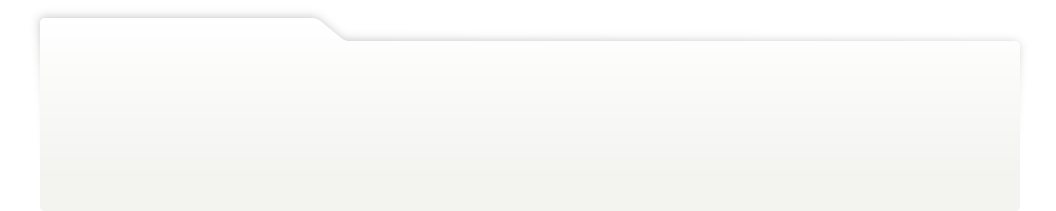
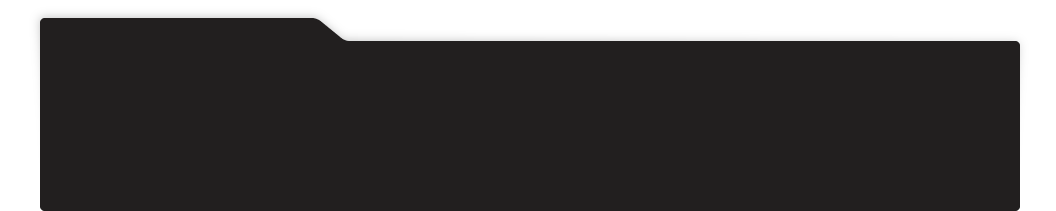
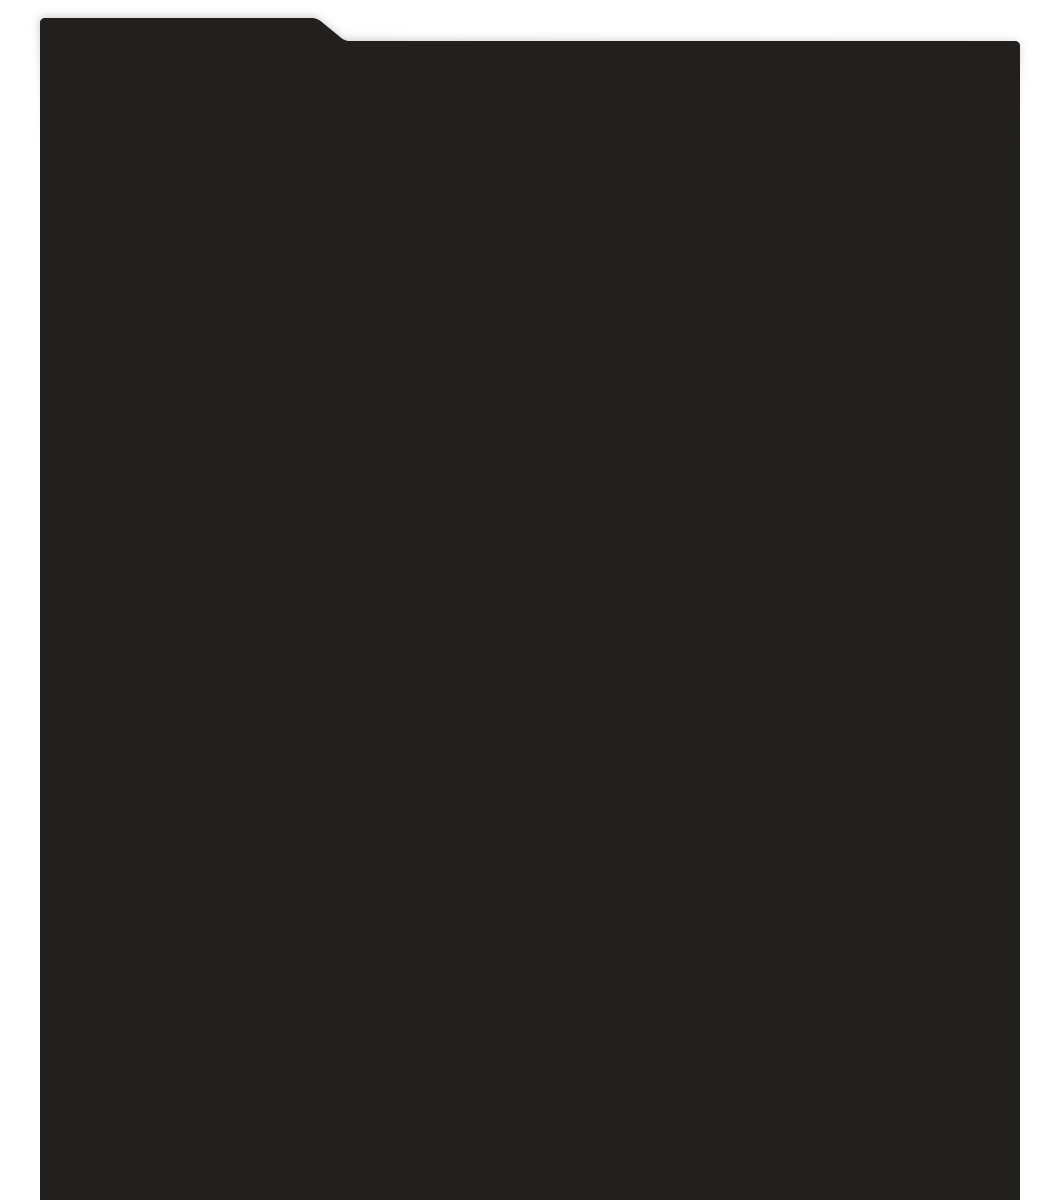
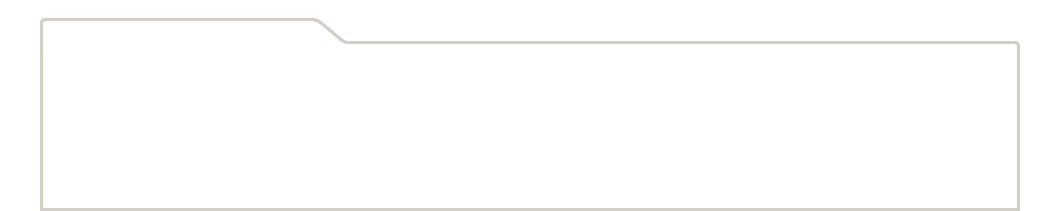
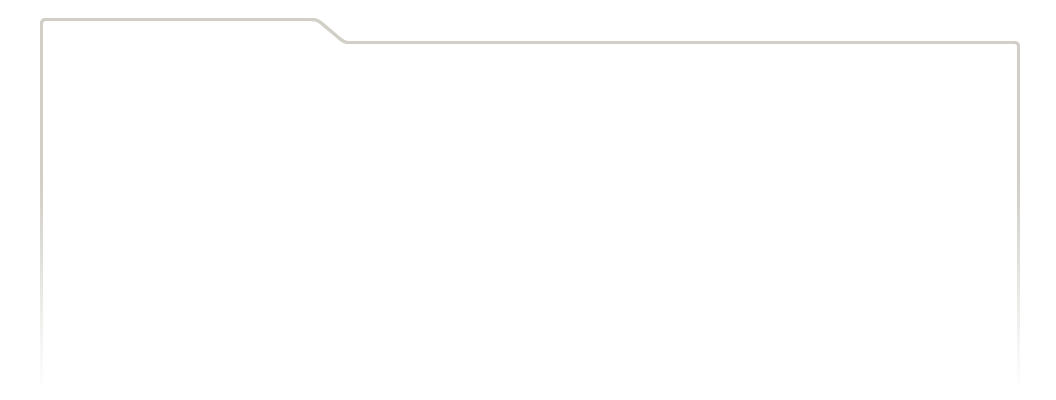
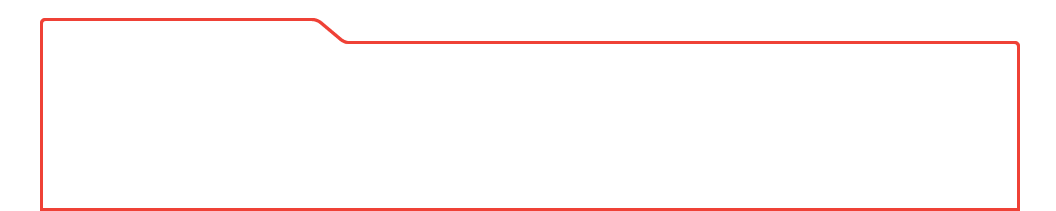
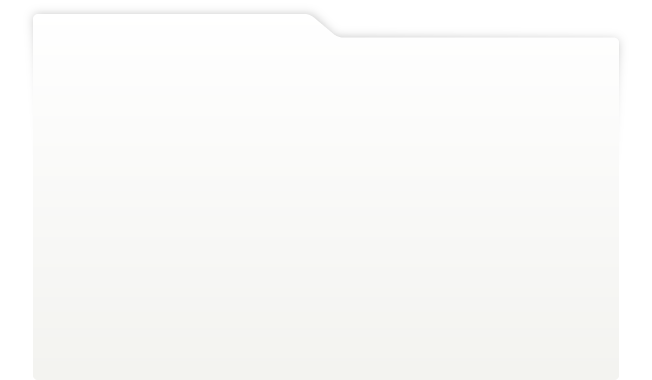
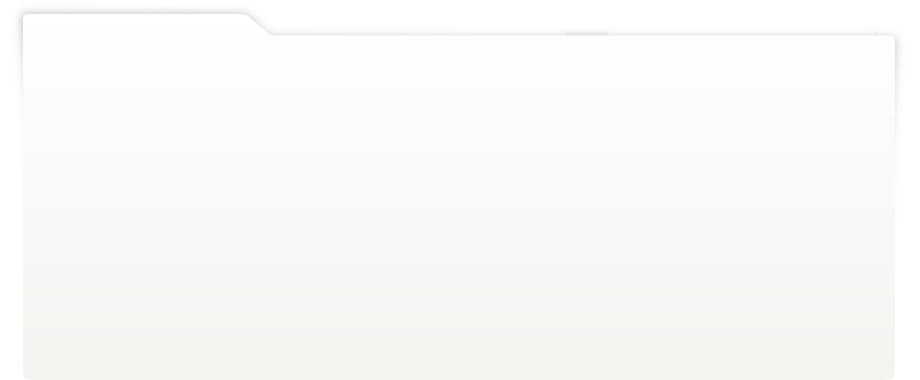
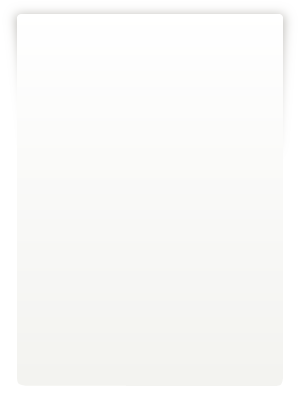
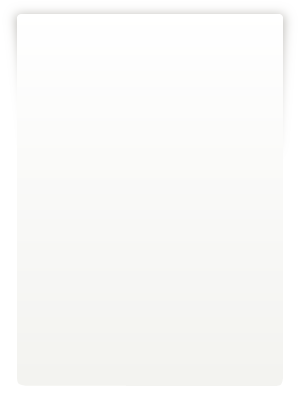
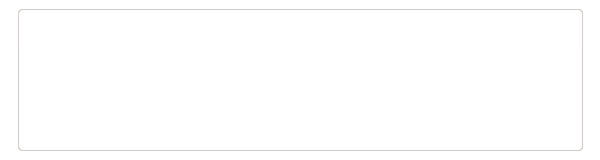
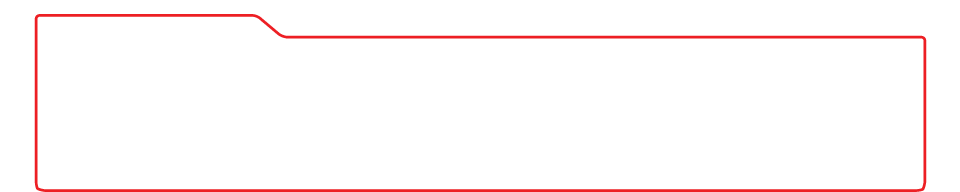
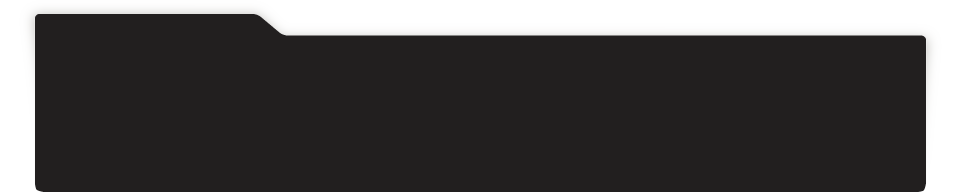
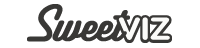
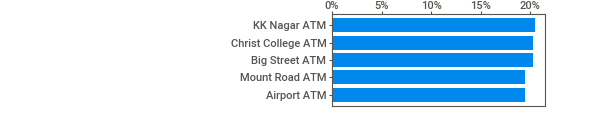
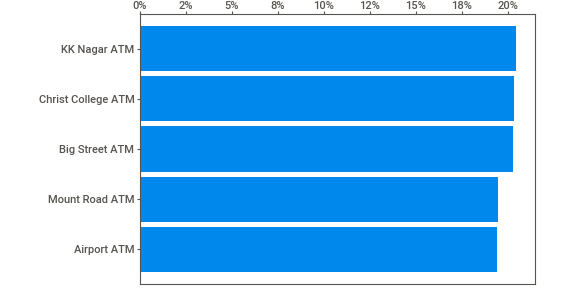
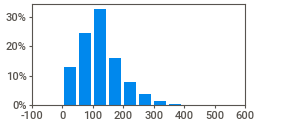
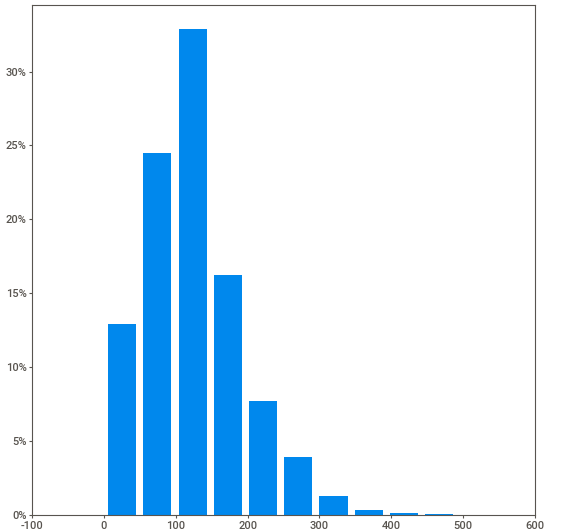
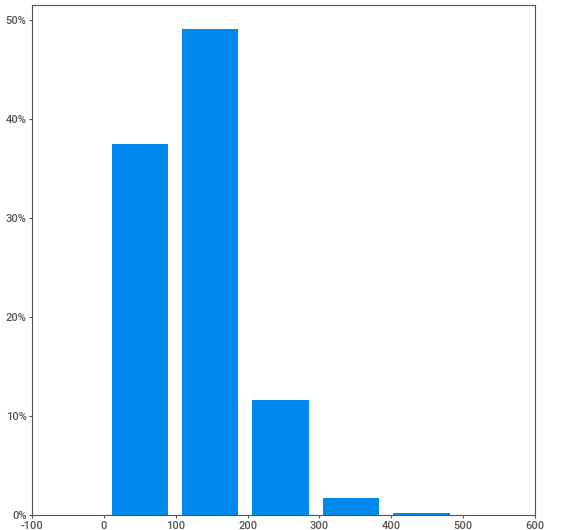
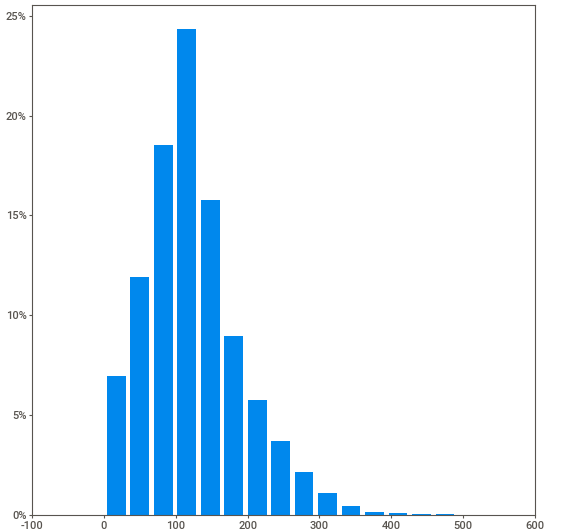
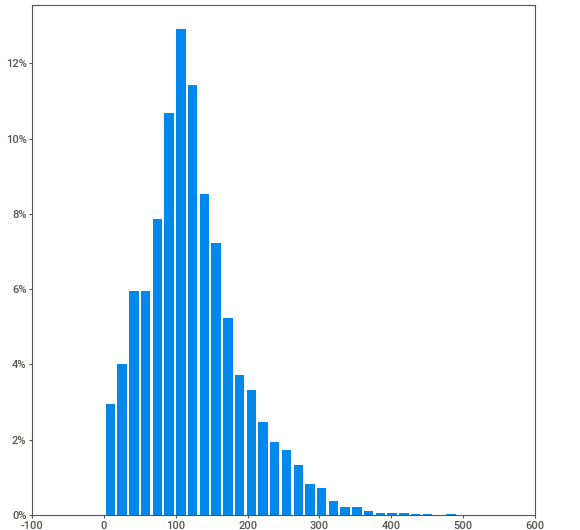
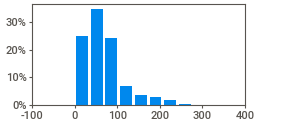
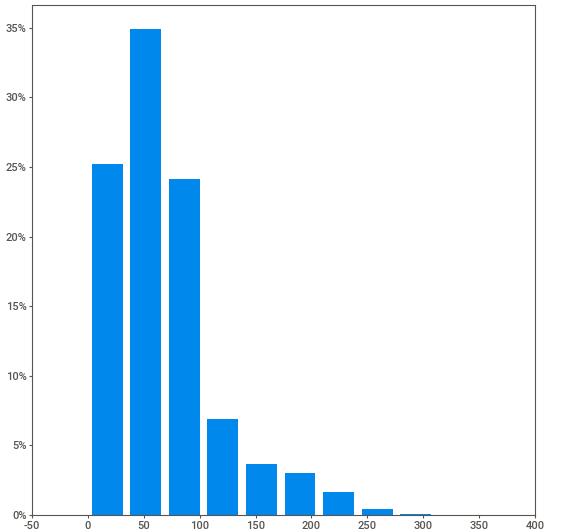
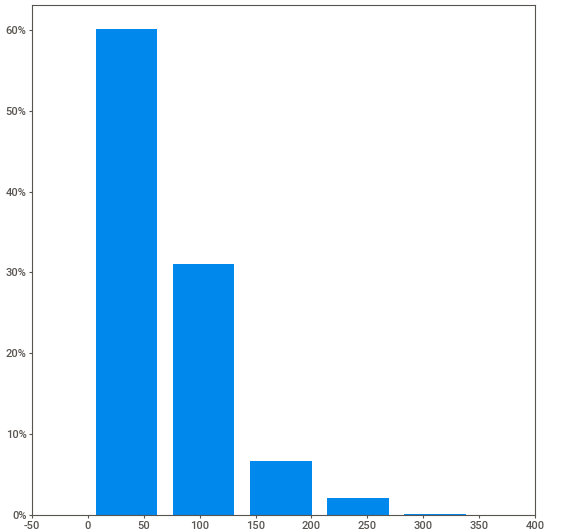
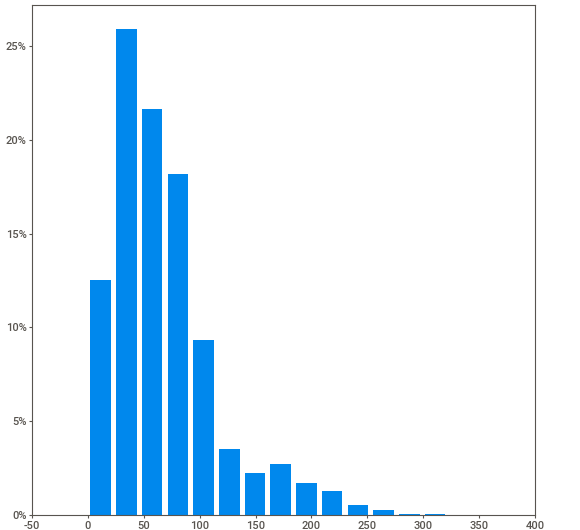
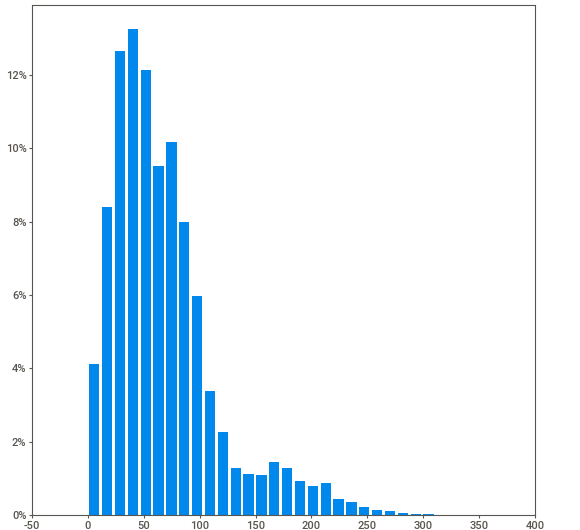
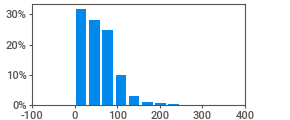
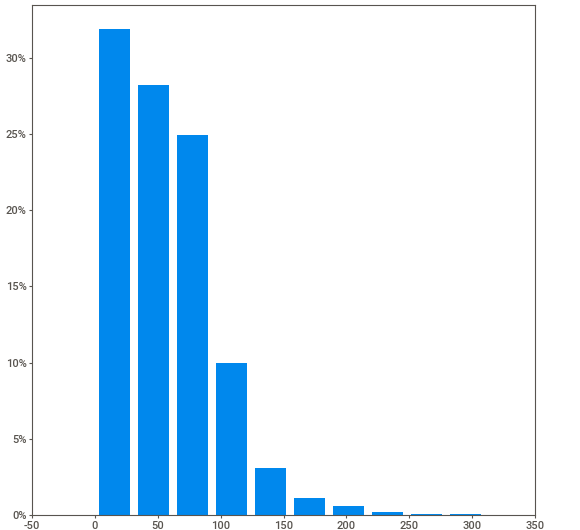
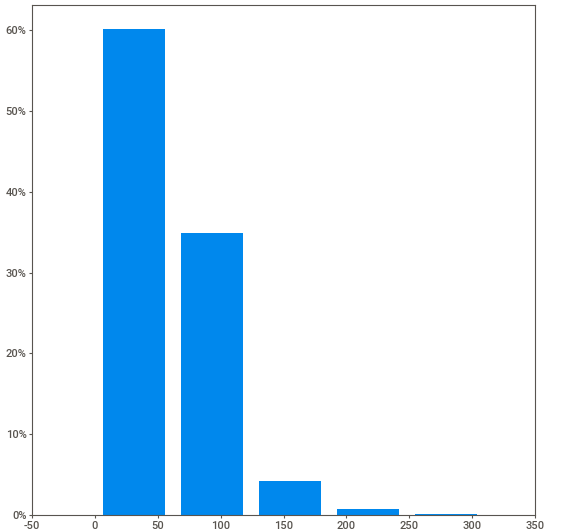
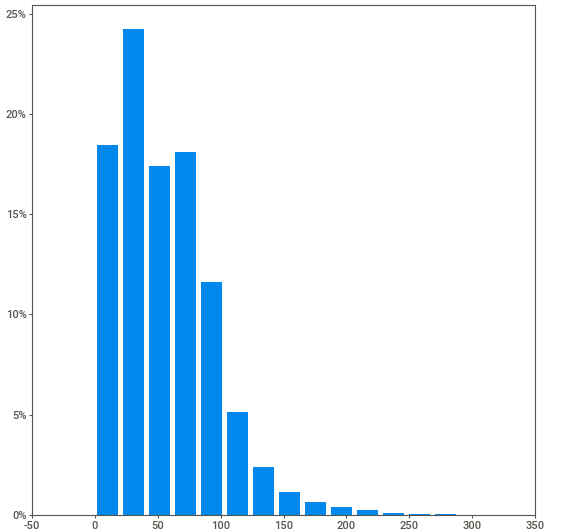
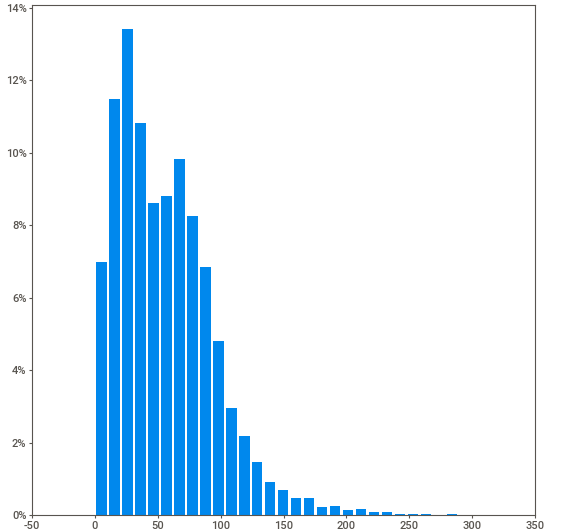
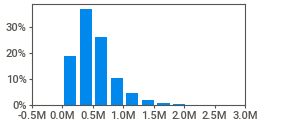
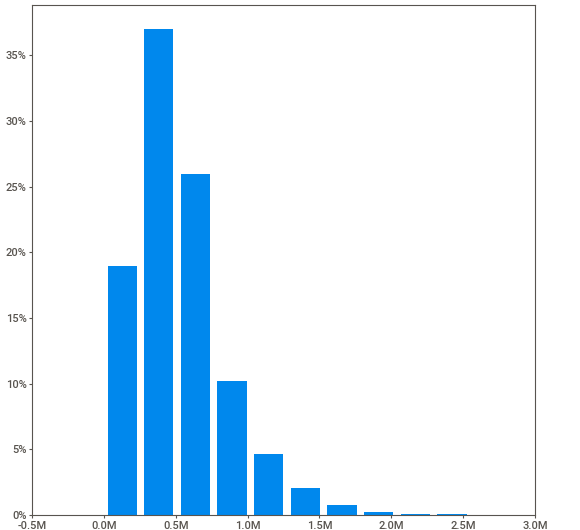
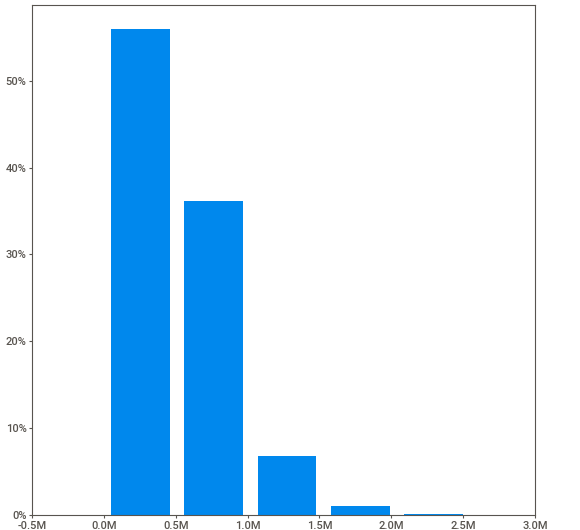
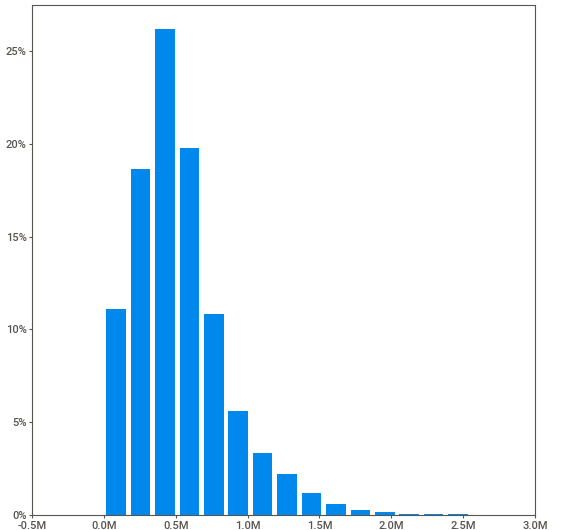
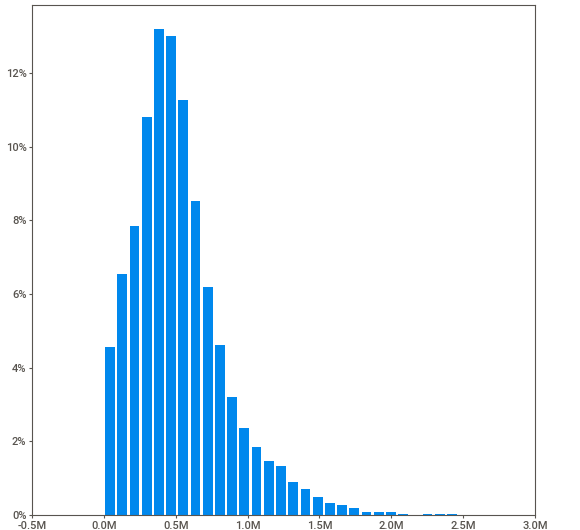
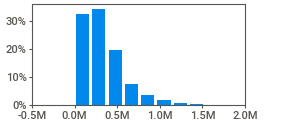
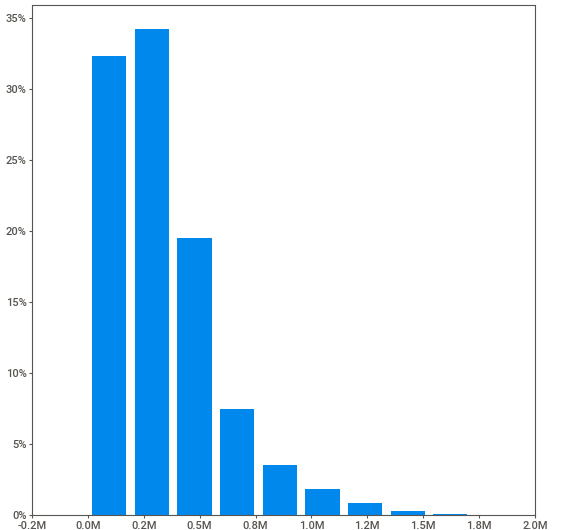
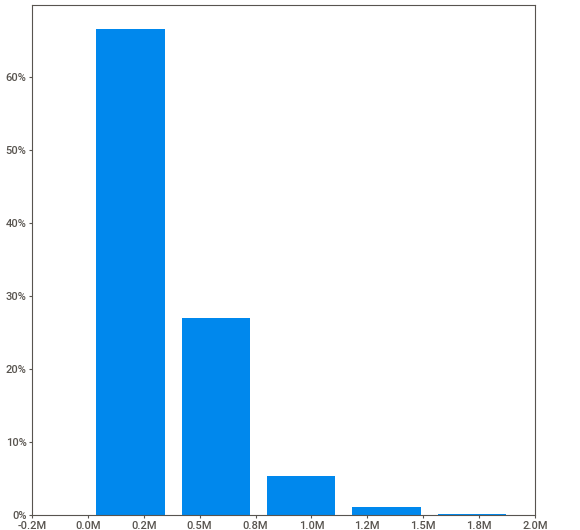
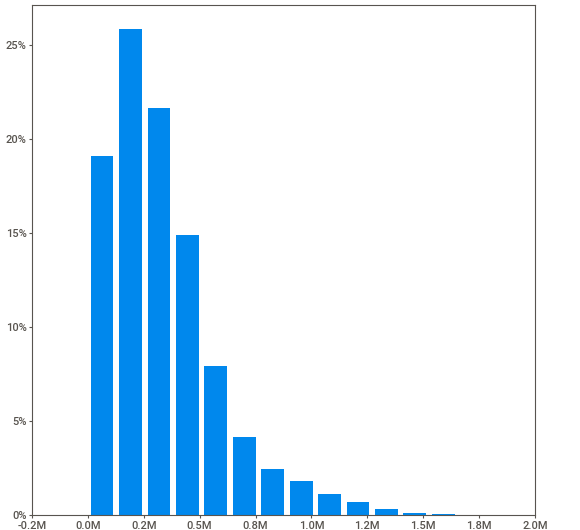
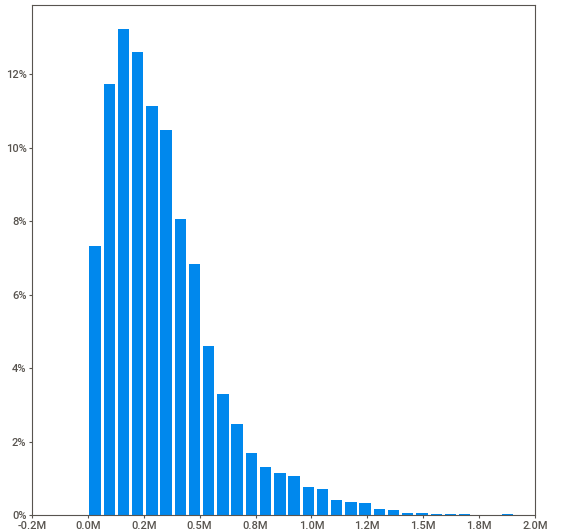
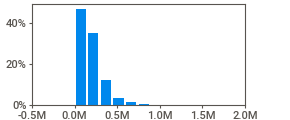
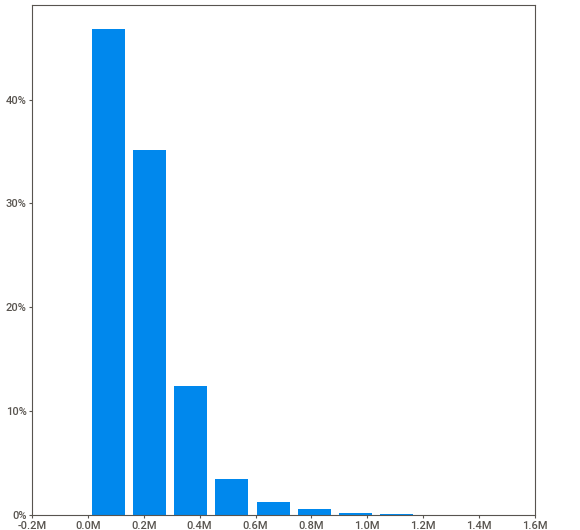
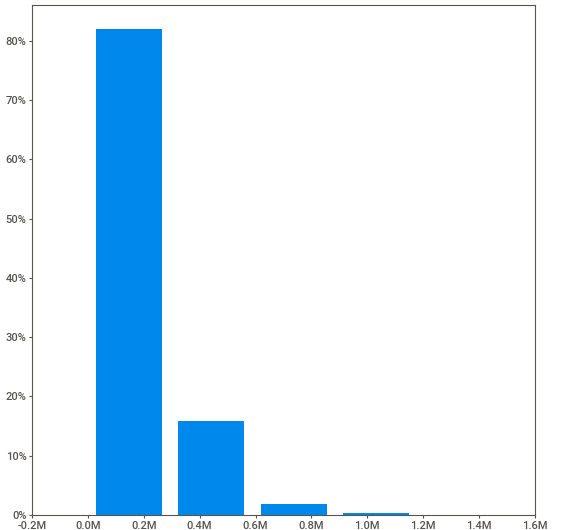
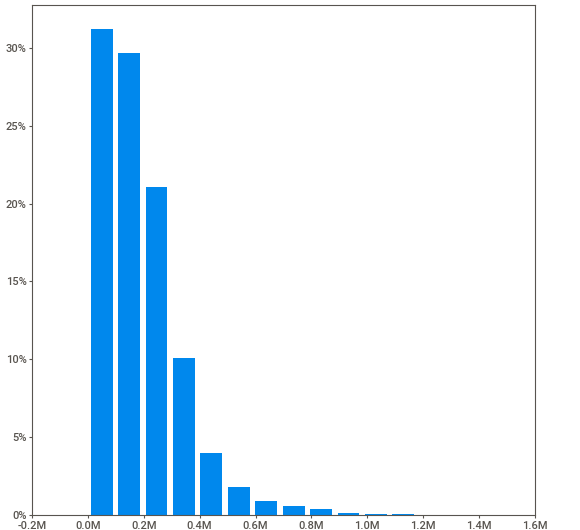
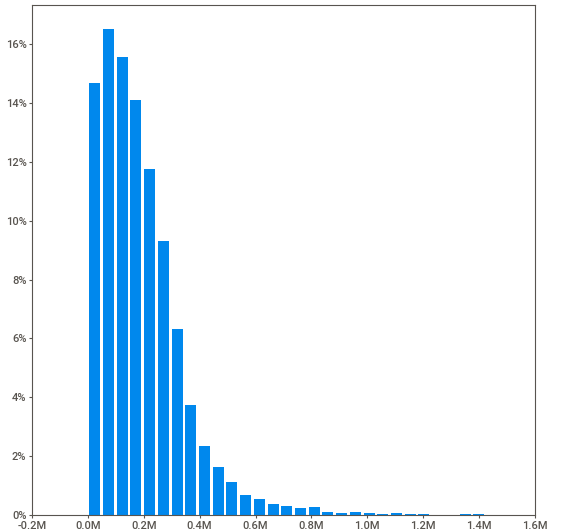
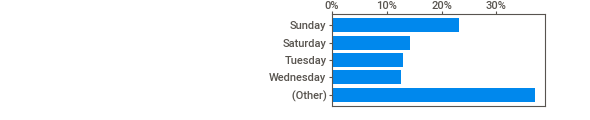
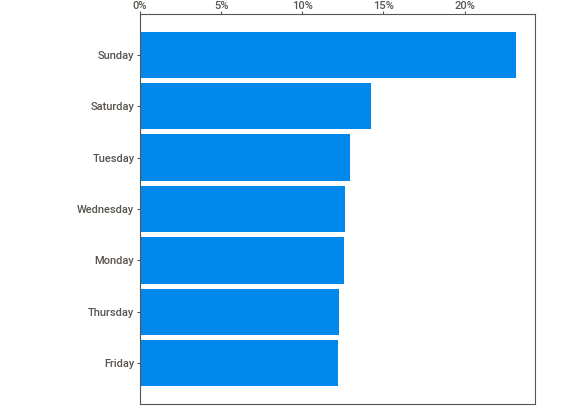
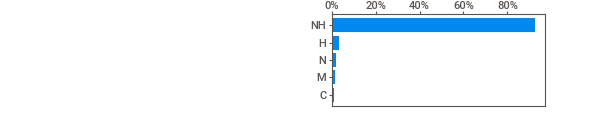
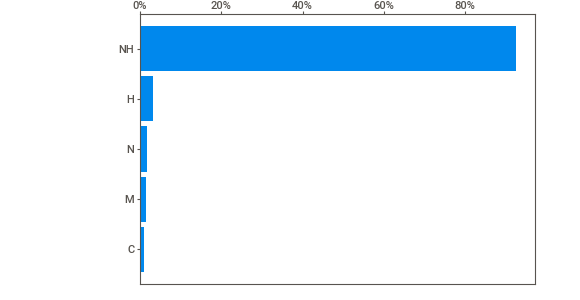
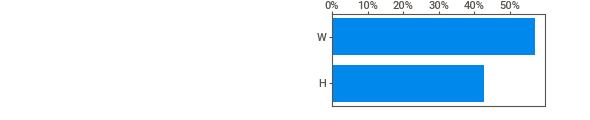
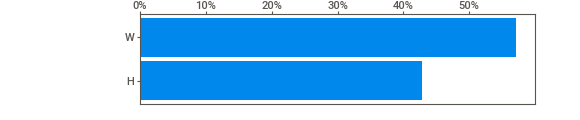
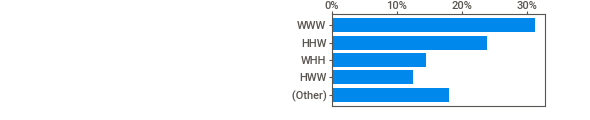
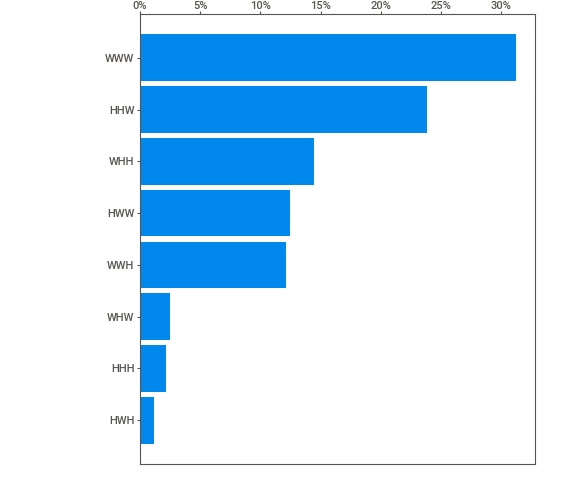
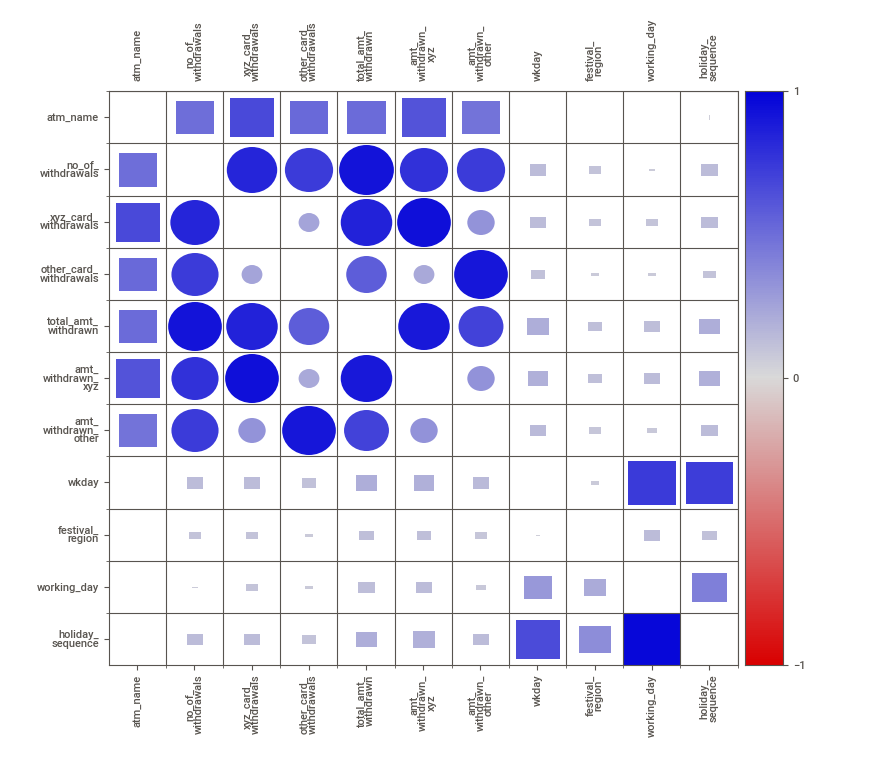
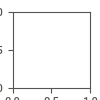

In [32]:
report.show_notebook(scale=0.6, layout='widescreen', h='1400')

In [ ]:
atms = atm.groupby('atm_name')[['no_of_withdrawals', 'xyz_card_withdrawals', 'other_card_withdrawals']].sum()
atms_amt = atm.groupby('atm_name')[['total_amt_withdrawn', 'amt_withdrawn_xyz', 'amt_withdrawn_other']].mean()


In [ ]:
trace = px.line(atms,
                x=atms.index,
                y='no_of_withdrawals', width=700,
                markers=True, text='no_of_withdrawals',
                title= 'Total number of withdrawals at each ATM',
                labels={'atm_name':'', 'no_of_withdrawals':'Number of withdrawals'})

trace.update_yaxes(showticklabels=False)
trace.update_traces(texttemplate='%{text:.2s}', textposition='top center')
trace.show()

fig = go.Figure()

fig.add_trace(go.Scatter(x=atms.index, y=atms.xyz_card_withdrawals, 
                         name='XYZ Cards', line=dict(color='firebrick', width=4, dash='dot')))
fig.add_trace(go.Scatter(x=atms.index, y=atms.other_card_withdrawals,
                         name='Other Card', line=dict(color='royalblue', width=4, dash='dot')))
fig.update_layout(title='Total number of withdrawals by cards',
                  yaxis_title = 'Number of withdrawals',
                  width=750)
fig.show()

fig = go.Figure()

fig.add_trace(go.Scatter(x=atms_amt.index, y=atms_amt.amt_withdrawn_xyz, 
                         name='XYZ Cards', line=dict(color='firebrick', width=4, dash='dot')))
fig.add_trace(go.Scatter(x=atms_amt.index, y=atms_amt.amt_withdrawn_other,
                         name='Other Card', line=dict(color='royalblue', width=4, dash='dot')))
fig.update_layout(title='Average amount of withdrawals by cards',
                  yaxis_title = 'Average amount',
                  width=750)
fig.show()

In [ ]:
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
atms = atm.groupby('wkday')[['no_of_withdrawals', 'xyz_card_withdrawals', 'other_card_withdrawals']].sum().reindex(days)
atms_amt = atm.groupby('wkday')[['total_amt_withdrawn', 'amt_withdrawn_xyz', 'amt_withdrawn_other']].mean().reindex(days)


In [ ]:
trace = px.line(atms,
                x=atms.index,
                y='no_of_withdrawals', width=700,
                markers=True, text='no_of_withdrawals',
                title= 'Total number of withdrawals at each ATM',
                labels={'atm_name':'', 'no_of_withdrawals':'Number of withdrawals'})

trace.update_yaxes(showticklabels=False)
trace.update_traces(texttemplate='%{text:.2s}', textposition='top center')
trace.show()

fig = go.Figure()

fig.add_trace(go.Scatter(x=atms.index, y=atms.xyz_card_withdrawals, 
                         name='XYZ Cards', line=dict(color='firebrick', width=4, dash='dot')))
fig.add_trace(go.Scatter(x=atms.index, y=atms.other_card_withdrawals,
                         name='Other Card', line=dict(color='royalblue', width=4, dash='dot')))
fig.update_layout(title='Total number of withdrawals by cards',
                  yaxis_title = 'Number of withdrawals',
                  width=750)
fig.show()

fig = go.Figure()

fig.add_trace(go.Scatter(x=atms_amt.index, y=atms_amt.amt_withdrawn_xyz, 
                         name='XYZ Cards', line=dict(color='firebrick', width=4, dash='dot')))
fig.add_trace(go.Scatter(x=atms_amt.index, y=atms_amt.amt_withdrawn_other,
                         name='Other Card', line=dict(color='royalblue', width=4, dash='dot')))
fig.update_layout(title='Average amount of withdrawals by cards',
                  yaxis_title = 'Average amount',
                  width=750)
fig.show()

In [ ]:
atms = atm.groupby('holiday_sequence')[['no_of_withdrawals', 'xyz_card_withdrawals', 'other_card_withdrawals']].sum()
atms_amt = atm.groupby('holiday_sequence')[['total_amt_withdrawn', 'amt_withdrawn_xyz', 'amt_withdrawn_other']].mean()


In [ ]:
trace = px.line(atms,
                x=atms.index,
                y='no_of_withdrawals', width=700,
                markers=True, text='no_of_withdrawals',
                title= 'Total number of withdrawals at each ATM',
                labels={'atm_name':'', 'no_of_withdrawals':'Number of withdrawals'})

trace.update_yaxes(showticklabels=False)
trace.update_traces(texttemplate='%{text:.2s}', textposition='top center')
trace.show()

fig = go.Figure()

fig.add_trace(go.Scatter(x=atms.index, y=atms.xyz_card_withdrawals, 
                         name='XYZ Cards', line=dict(color='firebrick', width=4, dash='dot')))
fig.add_trace(go.Scatter(x=atms.index, y=atms.other_card_withdrawals,
                         name='Other Card', line=dict(color='royalblue', width=4, dash='dot')))
fig.update_layout(title='Total number of withdrawals by cards',
                  yaxis_title = 'Number of withdrawals',
                  width=750)
fig.show()

fig = go.Figure()

fig.add_trace(go.Scatter(x=atms_amt.index, y=atms_amt.amt_withdrawn_xyz, 
                         name='XYZ Cards', line=dict(color='firebrick', width=4, dash='dot')))
fig.add_trace(go.Scatter(x=atms_amt.index, y=atms_amt.amt_withdrawn_other,
                         name='Other Card', line=dict(color='royalblue', width=4, dash='dot')))
fig.update_layout(title='Average amount of withdrawals by cards',
                  yaxis_title = 'Average amount',
                  width=750)
fig.show()

In [ ]:
trace = go.Scatter(
    x=atm.no_of_withdrawals,
    y=atm.total_amt_withdrawn,
    mode = 'markers'
)
data = [trace]

fig = dict(data=data)
po.iplot(fig)

In [ ]:
sb.regplot(data=atm, x= 'no_of_withdrawals', y='total_amt_withdrawn',
           x_jitter= 0.8, scatter_kws={'alpha':0.1, 's':10})
plt.yscale('log');

In [ ]:
g = sb.PairGrid(data=atm, vars=['no_of_withdrawals', 'xyz_card_withdrawals', 'other_card_withdrawals', 
                                'total_amt_withdrawn', 'amt_withdrawn_xyz', 'amt_withdrawn_other'])
g = g.map_offdiag(sb.scatterplot)
g.map_diag(plt.hist);

In [ ]:
range(11)